## Part 1. Load dataset and split into training and testing sets 

In [35]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch
import numpy as np
from sklearn.datasets import load_diabetes
diabetes_db  = load_diabetes()
print(diabetes_db.DESCR)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

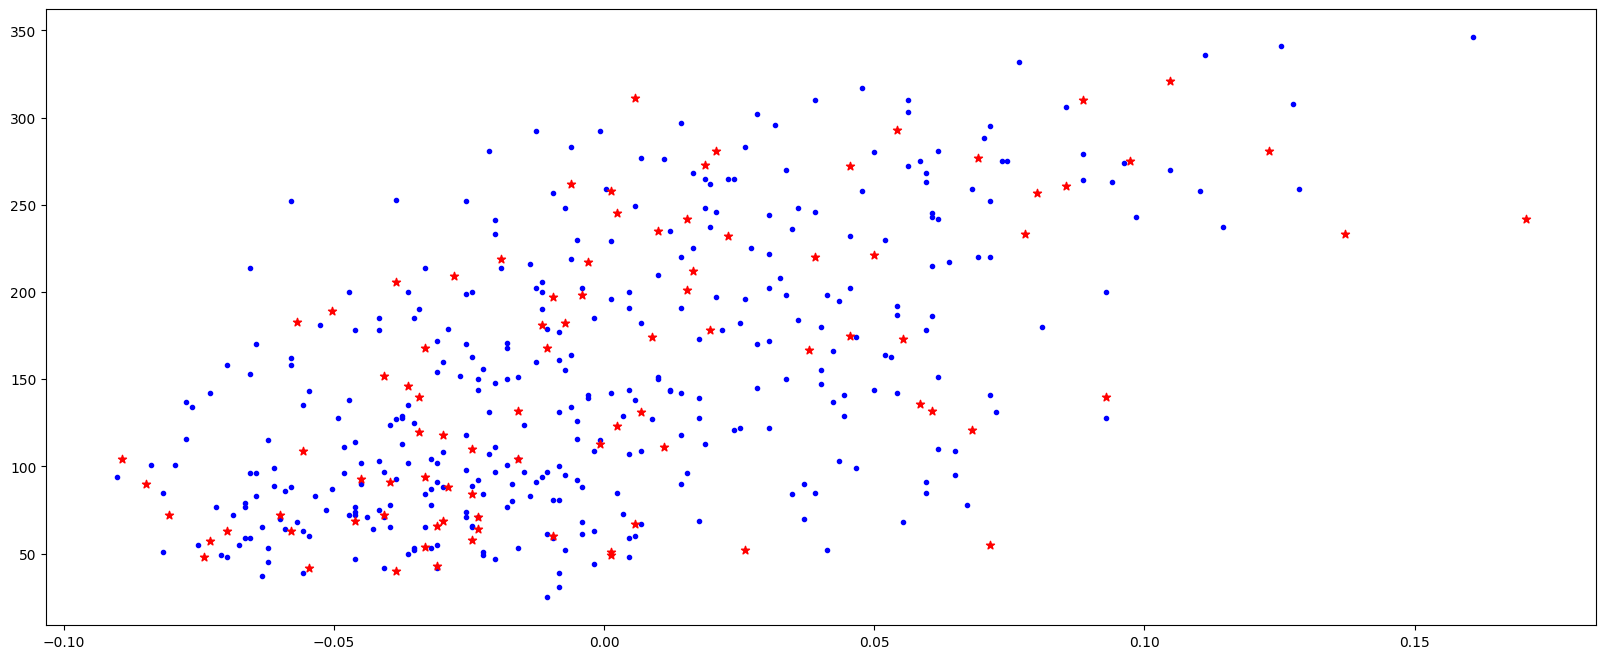

In [36]:
# TODO: (3 points, details are given below): 

# get the relevant data from the diabetes_db dictionary and assign them to the Tensors x (feature variables) and y (target)  (1 point)
X = torch.tensor(diabetes_db.data, dtype=torch.float32)
y = torch.tensor(diabetes_db.target, dtype=torch.float32)

# divide the data in a train set (80% of the data) and test set (20% of the data). Resulting in x_train, x_test, y_train, y_test (1 point)
# Split the data into training and testing sets
n = len(X) # number of instances
split = int(n * 0.8) # split point
X_train = X[:split] # first 80% of X
X_test = X[split:] # last 20% of X
y_train = y[:split] # first 80% of y
y_test = y[split:] # last 20% of y

# plot the third feature 'bmi' in relationship with the target y. Train and test data should be in a single figure with two different showing styles (1 point)
plt.figure(figsize=(20, 8))
plt.scatter(X_train[:, 2], y_train, label='Training data', marker='.', color='blue')
plt.scatter(X_test[:, 2], y_test, label='Testing data', marker='*', color='red')



## Part 2. Solving the linear regression problem in Pytorch using Gradient Descent Algorithm

### 2.1 Model
In this part, you will define your own model class. To do that, you have to remember the following rules:
1. The model class should be inherited from [`nn.Module`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module);
2. Re-write the **\_\_init\_\_** function and the **forward** function;
3. In the **\_\_init\_\_** function, you should always call the parent's **\_\_init\_\_** function first.

To make it simpler, since we are using a linear function to approximate the phenomenon that generated the data, our function will be:

\begin{align*}
y = w^T x + b 
\end{align*}

Therefore, in the model, we need to set 2 parameters: $w$, $b$

In [24]:
# TODO (3.5 points, details are given below)
import torch.nn as nn


# define a class (0.5) + write the __init__ function (1.5 point) + write the forward function (1.5 points)

class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.w = nn.Parameter(torch.randn(10))
        self.b = nn.Parameter(torch.rand(1))

    def forward(self, x):
        out = torch.sum(self.w*x, dim=1)+self.b
        return out

### 2.2 Training
Here, you will train your model based on the training data and evaluate the model on testing data.
1. Set proper number of iterations and learning rate.
2. Remember to use a proper optimizer (you may have many choices: Adam, SGD, RMSprop, ... please find the detailed information in https://pytorch.org/docs/stable/optim.html and know how to use them).
3. In order to train the model, a loss function should be defined:
\begin{align*}
loss = \frac{1}{N}\sum_{i=1}^{N}|f_i - y_i|,
\end{align*}
where, $f_i$ is the output of the model and $N$ is the number of training data pairs.
4. The model must be trained only using training data.
5. Remember to clear the old gradients of parameters before a new backward propagation.
6. In every certain number of iterations, print the training loss, and the testing loss.
7. Meanwhile, please track the training loss and the testing loss in each iteration. Once the training is done, the curves of losses should be plotted (two curves are drawn in the same figure, where x axis indicates iterations and y axis indicates the losses).
8. Lastly, draw all the training data, testing data and the curve of the trained model in the same figure (use different showing styles to distinguish them).

In [25]:
# TODO (8.5 points, details are given below)

# Make a instance of the model class (0.5 point)
model = LinearModel()

# create an optimizer, set a workable learing rate (0.5 point + 0.5 point)
optimizer = torch.optim.Adam(model.parameters(), lr=0.08)  # Stochastic Gradient Descent optimizer

training_losses = []
testing_losses = []

n_itr = 10000

for i in range(n_itr):

    # Train
    # forward propagation 
    model.train() # change model to train mode
    
    # calculate the output of model (0.5 point)
    output = model(X_train)
    
    # calculate loss according to the above equation (0.5 point)
    e = torch.abs(output - y_train)
    loss = e.mean()   
    
    training_losses.append(loss.item())


    # backward propagation 
    # clear old gradients (0.5)
    optimizer.zero_grad()
    
    
    # calculate gradients of parameters (1 point)
    loss.backward()
    
    # gradient descent algorithm (1 point)
    optimizer.step()
    
    # Evaluate, calculate the testing loss (0.5 point)
    model.eval() # change model to eval mode
    
    eval_output = model(X_test)
    
    tl = torch.abs(eval_output - y_test)  
    test_loss = tl.mean()
    
    testing_losses.append(test_loss.item())
    
    # print intermediate losses for certain iterations (1 point)
    if i % 100 == 1: 
        print('Iteration: %04d | Training loss: %f | Testing loss: %f' % \
              (i, loss.data, test_loss.data))
    
    

Iteration: 0001 | Training loss: 150.928406 | Testing loss: 154.102768
Iteration: 0101 | Training loss: 142.897507 | Testing loss: 146.225357
Iteration: 0201 | Training loss: 134.866608 | Testing loss: 138.347916
Iteration: 0301 | Training loss: 126.860374 | Testing loss: 130.475113
Iteration: 0401 | Training loss: 118.930801 | Testing loss: 122.618492
Iteration: 0501 | Training loss: 111.103905 | Testing loss: 114.754036
Iteration: 0601 | Training loss: 103.558197 | Testing loss: 106.970627
Iteration: 0701 | Training loss: 96.607048 | Testing loss: 99.606712
Iteration: 0801 | Training loss: 90.213104 | Testing loss: 93.166313
Iteration: 0901 | Training loss: 84.489616 | Testing loss: 87.340866
Iteration: 1001 | Training loss: 79.113838 | Testing loss: 82.164864
Iteration: 1101 | Training loss: 74.039459 | Testing loss: 77.290749
Iteration: 1201 | Training loss: 69.683258 | Testing loss: 73.018372
Iteration: 1301 | Training loss: 65.748627 | Testing loss: 68.962753
Iteration: 1401 | Tr

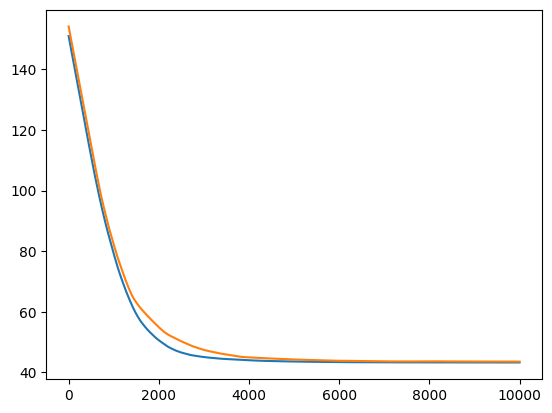

In [26]:
# plot the traing losses (0.5 point) and testing losses (0.5 point)
plt.plot(training_losses, label="Training Loss")
plt.plot(testing_losses, label="Testing Loss")
plt.show()


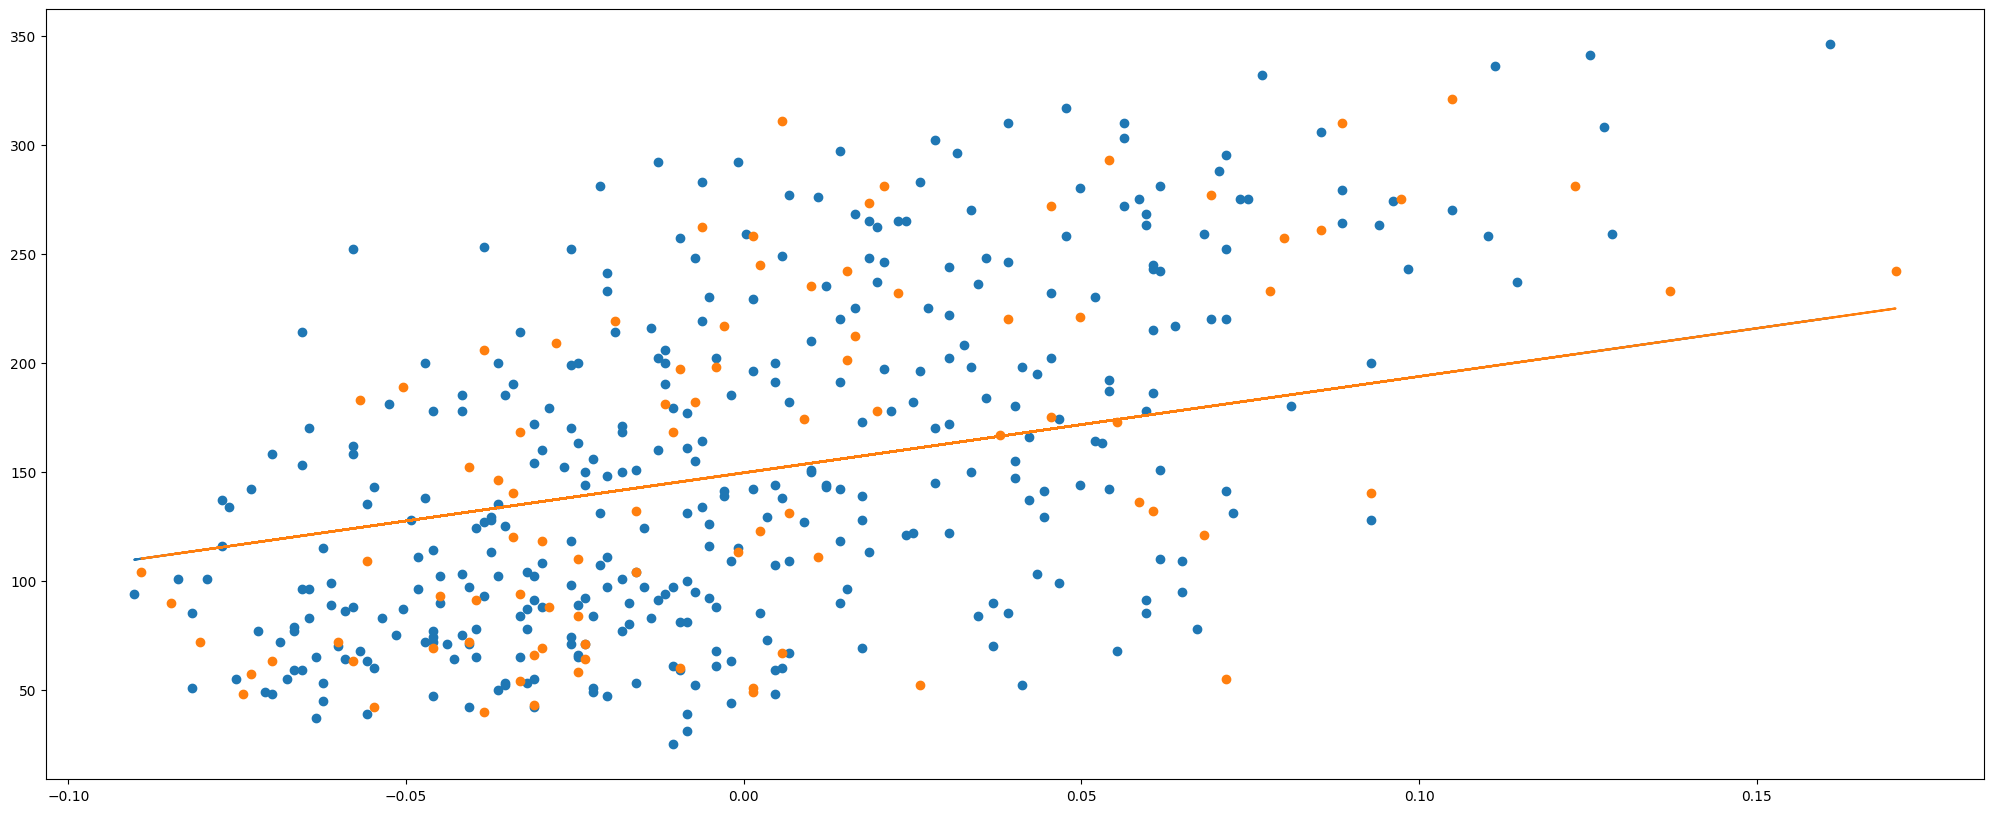

In [34]:
# As our model contains a 10 dimensionsional input we will only plot the relationship between the third variable 'bmi' and the target.
# Again plot the train and test data (from Part1), and add a line where the slope and axis intercept are taken from the model parameters w and b
# (1 point)
plt.figure(figsize=(25, 10))
plt.scatter(X_train[:, 2], y_train, label="Training Data")
plt.scatter(X_test[:, 2], y_test, label="Testing Data")
plt.plot(X_train[:, 2], X_train[:, 2]* model.w.data[2]+model.b.data)
plt.plot(X_test[:, 2], X_test[:, 2]* model.w.data[2]+model.b.data)


